# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results,mouse_metadata,on = "Mouse ID",how='left')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = len(combined_df["Mouse ID"].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_df.loc[combined_df["Mouse ID"] == "g989",:]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mice) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = len(clean_df["Mouse ID"].unique())
mice_count_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Mean_Tumor_Volume = clean_df.groupby("Drug Regimen").mean(numeric_only=True)["Tumor Volume (mm3)"]
Median_Tumor_Volume = clean_df.groupby("Drug Regimen").median(numeric_only=True)["Tumor Volume (mm3)"]
Variance_Tumor_Volume = clean_df.groupby("Drug Regimen").var(numeric_only=True)["Tumor Volume (mm3)"]
STD_Tumor_Volume = clean_df.groupby("Drug Regimen").std(numeric_only=True)["Tumor Volume (mm3)"]
SEM_Tumor_Volume = clean_df.groupby("Drug Regimen").sem(numeric_only=True)["Tumor Volume (mm3)"]

Summary_Statistics = pd.DataFrame({'Mean Tumor Volume':Mean_Tumor_Volume,
                                  'Median Tumor Volume':Median_Tumor_Volume,
                                  'Tumor Volume Variance':Variance_Tumor_Volume,
                                  'Tumor Volume Std. Dev.':STD_Tumor_Volume,
                                  'Tumor Volume Std. Err.':SEM_Tumor_Volume})
Summary_Statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
single_line_group = clean_df.groupby('Drug Regimen')
Summary_Statistics2 = single_line_group.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
Summary_Statistics2

C:\Users\georg\AppData\Local\Temp\ipykernel_23620\1425775499.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  Summary_Statistics2 = single_line_group.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

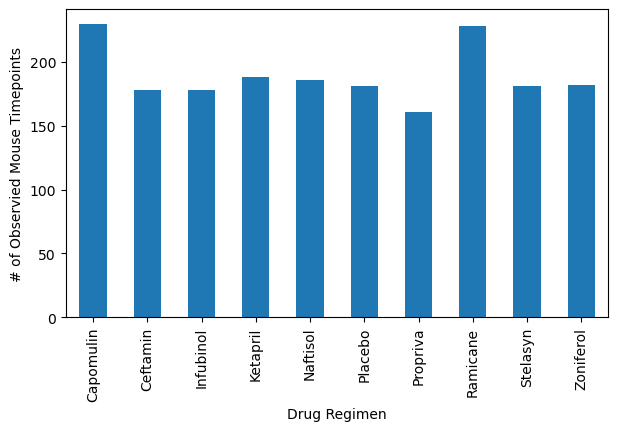

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_per_drug = combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

pandas_plot = mice_per_drug.plot(kind="bar", color='tab:blue', figsize=(7,4), fontsize = 10)
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("# of Observied Mouse Timepoints",fontsize = 10)
plt.show()
plt.tight_layout()

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

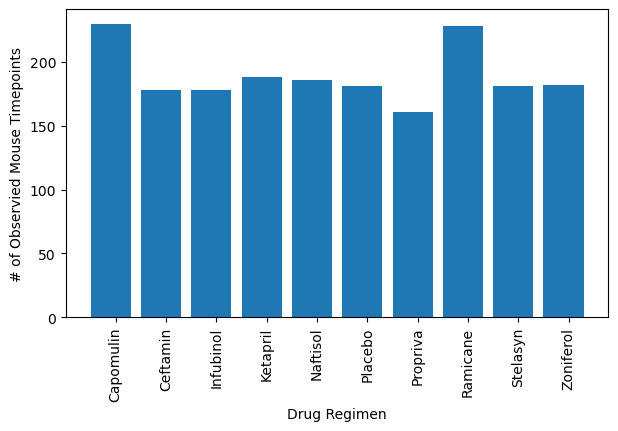

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
treatment_count = (combined_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
treatment_count

x_axis = np.arange(len(mice_per_drug))
tick_locations = [value+0.5 for value in x_axis]
fig1, ax1 = plt.subplots(figsize=(7,4))
plt.xticks(tick_locations, mice_per_drug.index.values, rotation="vertical")
plt.bar(x_axis, treatment_count, color='tab:blue', alpha=1, align="edge")
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("# of Observied Mouse Timepoints",fontsize = 10)

treatment_count

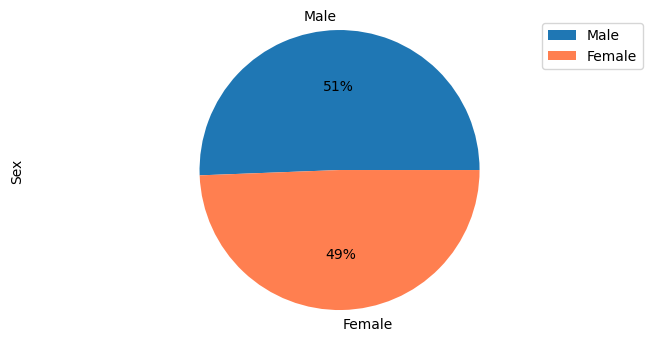

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_rows = combined_df.loc[:, ["Sex", "Mouse ID"]]
gender_count = gender_rows["Sex"].value_counts()
gender_rows = gender_rows.drop_duplicates()
gender_data = pd.DataFrame({"Sex": gender_count})

colors = ["tab:blue", "coral"]
explode = (0.1, 0)
pandas_pie = gender_data.plot(kind="pie", figsize=(8,4), colors=colors, y= "Sex",
                              startangle=360, shadow=False, autopct="%1.00f%%")
plt.axis("equal")
plt.show()

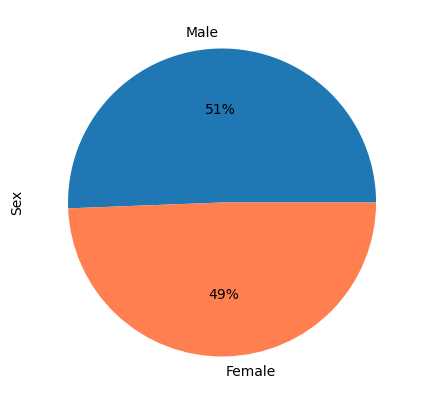

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_rows = combined_df.loc[:, ["Sex", "Mouse ID"]]
gender_count = gender_rows["Sex"].value_counts()
gender_rows = gender_rows.drop_duplicates()
gender_data = pd.DataFrame({"Total Count": gender_count})

labels = ["Male", "Female"]
colors = ["tab:blue", "coral"]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(8, 5))
plt.ylabel("Sex",fontsize = 10)
plt.pie(gender_count, labels=labels, colors=colors, startangle=360, autopct="%1.00f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tumor = clean_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor =max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_data = max_tumor.merge(clean_df,on=['Mouse ID','Timepoint'],how ="left")


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_name=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drugs_name:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"]== drug,'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
 
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol<lower_bound)|(final_tumor_vol>upper_bound)]
    
    print(f"{drug}'5 potentioal outliers:{outliers}")
    

Capomulin'5 potentioal outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane'5 potentioal outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol'5 potentioal outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin'5 potentioal outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


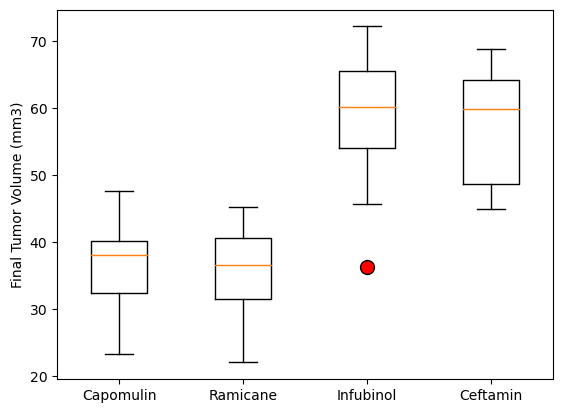

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor='red', markersize=10)
plt.boxplot(tumor_vol_list, labels=drugs_name, flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()



## Line and Scatter Plots

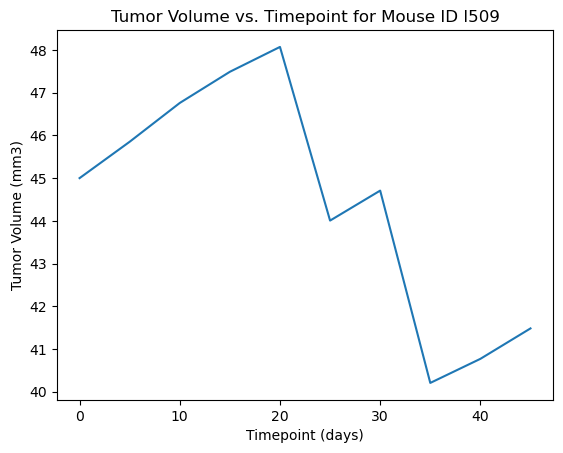

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"
clean_df = clean_df.loc[clean_df["Mouse ID"] == mouse_id]

# Get the tumor volume data
tumor_volume = clean_df["Tumor Volume (mm3)"]

# Get the time point data
time_point = clean_df["Timepoint"]

# Plot the data
plt.plot(time_point, tumor_volume)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Timepoint for Mouse ID l509")
plt.show()

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

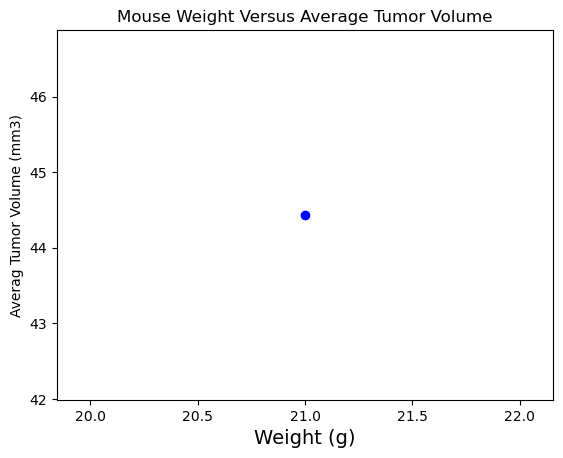

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_df= clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
fig1, ax1 = plt.subplots()
avg_capm_vol = Capomulin_df.groupby(['Mouse ID']).mean(numeric_only=True)

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')


## Correlation and Regression

In [ ]:
    # Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen